In [2]:
import cv2
from matplotlib import pyplot as plt
from skimage.segmentation import clear_border
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)

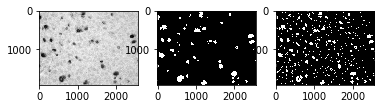

In [2]:
img = cv2.imread("1.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# gray_correct = np.array(255 * (gray / 255) ** 1.2 , dtype='uint8')

ret, thres = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

thres1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 10)
thres1 = cv2.bitwise_not(thres1)

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(thres, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(thres1, cmap="gray")

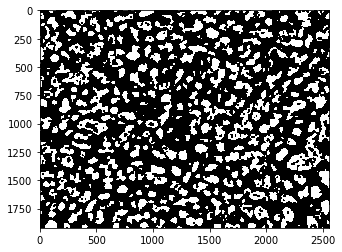

In [53]:
kernel = np.ones((3,3), np.uint8)
kernel1 = np.ones((7,7), np.uint8)
# if we increase iterations smaller nuclei will go off sometimes
opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel, iterations=2)
# opening = clear_border(opening)

# opening1 = cv2.morphologyEx(thres1, cv2.MORPH_OPEN, kernel1, iterations=1)
img_dilation = cv2.dilate(thres1, kernel1, iterations=2)
img_erode = cv2.erode(img_dilation,kernel1, iterations=2)
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)

kernel11 = np.ones((3,3), np.uint8)
opening1 = cv2.morphologyEx(img_erode, cv2.MORPH_OPEN, kernel11, iterations=4)

# plt.subplot(1, 2, 1)
# plt.imshow(opening, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(opening1, cmap="gray")

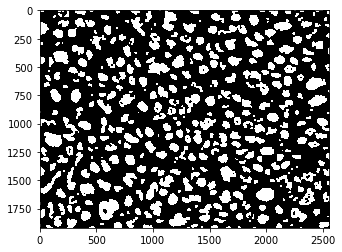

In [39]:
sure_bg = cv2.dilate(opening, kernel, iterations=10)

sure_bg1 = cv2.dilate(opening1, kernel11, iterations=2)

# plt.subplot(1, 2, 1)
# plt.imshow(sure_bg, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(sure_bg1, cmap="gray")

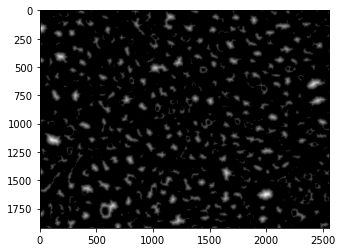

In [40]:
dist_trans = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

dist_trans1 = cv2.distanceTransform(opening1, cv2.DIST_L2, 5)

# plt.subplot(1, 2, 1)
# plt.imshow(dist_trans, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(dist_trans1, cmap="gray")

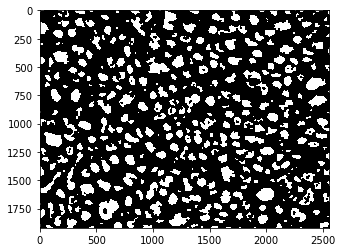

In [41]:
ret, sure_fg = cv2.threshold(dist_trans, 0.1*dist_trans.max(), 255, 0)

ret1, sure_fg1 = cv2.threshold(dist_trans1, 0.01*dist_trans1.max(), 255, 0)

# plt.subplot(1, 2, 1)
# plt.imshow(sure_fg, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(sure_fg1, cmap="gray")

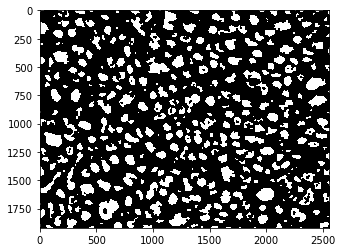

In [42]:
sure_fg = np.uint8(sure_fg)

sure_fg1 = np.uint8(sure_fg1)

# plt.subplot(1, 2, 1)
# plt.imshow(sure_fg, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(sure_fg1, cmap="gray")

45 429


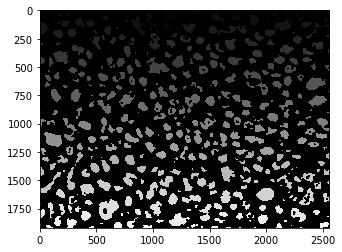

In [43]:
ret2, labels = cv2.connectedComponents(sure_fg)

ret3, labels1 = cv2.connectedComponents(sure_fg1)

print(ret2-1, ret3-1)
# plt.subplot(1, 2, 1)
# plt.imshow(labels, cmap="gray")
# plt.subplot(1, 2, 2)
plt.imshow(labels1, cmap="gray")

In [51]:
images = ['1.jpg', '2.jpg', '3.jpg', '4.jpg']

i=0
for image in images:
    img = cv2.imread(image)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    if(image=='1.jpg'):
        thresh = 120
        thresh1 = 10
        temp1 = 0.1
        temp2 = 0.01
        kernel = np.ones((3,3), np.uint8)
        kernel1 = np.ones((7,7), np.uint8)
        itr=2
    if(image=='2.jpg'):
        thresh = 120
        thresh1 = 10
        temp1 = 0.15
        temp2 = 0.01
        kernel = np.ones((3,3), np.uint8)
        kernel1 = np.ones((10,10), np.uint8)
        itr=1
    if(image =='3.jpg'):
        thresh=120
        thresh1 = 15
        temp1 = 0.2
        temp2 = 0.01
        kernel = np.ones((3,3), np.uint8)
        kernel1 = np.ones((3,3), np.uint8)
        itr=1
    if(image=='4.jpg'):
        thresh=125
        thresh1 = 8
        temp1 = 0.1
        temp2 = 0.01
        kernel = np.ones((3,3), np.uint8)
        kernel1 = np.ones((7,7), np.uint8)
        itr=2
    ret, thres = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY_INV)
    
    thres1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, thresh1)
    thres1 = cv2.bitwise_not(thres1)
    
#     kernel = np.ones((3,3), np.uint8)
#     kernel1 = np.ones((10,10), np.uint8)
    # if we increase iterations smaller nuclei will go off sometimes
    opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel, iterations=2)
    # opening = clear_border(opening)

    # opening1 = cv2.morphologyEx(thres1, cv2.MORPH_OPEN, kernel1, iterations=1)
    #Closing
    img_dilation = cv2.dilate(thres1, kernel1, iterations=itr)
    img_erode = cv2.erode(img_dilation,kernel1, iterations=itr)
    # clean all noise after dilatation and erosion
    img_erode = cv2.medianBlur(img_erode, 7)

    kernel11 = np.ones((3,3), np.uint8)
    opening1 = cv2.morphologyEx(img_erode, cv2.MORPH_OPEN, kernel11, iterations=4)
    
    #Sure Backgroung
    #dialating to make sure background gets perfect and donot mix with the items actually
    sure_bg = cv2.dilate(opening, kernel, iterations=10)
    sure_bg1 = cv2.dilate(opening1, kernel11, iterations=2)
    
    #distance transform
    dist_trans = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    dist_trans1 = cv2.distanceTransform(opening1, cv2.DIST_L2, 5)
    
    #thresholding after dist trans
    ret, sure_fg = cv2.threshold(dist_trans, temp1*dist_trans.max(), 255, 0)
    ret1, sure_fg1 = cv2.threshold(dist_trans1, temp2*dist_trans1.max(), 255, 0)
    
    #converting to unit8
    sure_fg = np.uint8(sure_fg)
    sure_fg1 = np.uint8(sure_fg1)
    
    #finding connected components
    ret2, labels = cv2.connectedComponents(sure_fg)
    ret3, labels1 = cv2.connectedComponents(sure_fg1)
    
    print((ret2-1),(ret3-1), (ret2-1)/(ret3-1))
          
#     i=i+1
#     plt.subplot(2, 2, i)
#     plt.imshow(opening1, cmap="gray")

45 429 0.1048951048951049
76 445 0.1707865168539326
103 328 0.31402439024390244
77 463 0.16630669546436286


# FINAL CODE

In [4]:
images = ['1.jpg', '2.jpg', '3.jpg', '4.jpg']

i=0
perc = []
for image in images:
    img = cv2.imread(image)
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ret, thres = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
    
    thres1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 8)
    thres1 = cv2.bitwise_not(thres1)
    
    kernel = np.ones((3,3), np.uint8)
    kernel1 = np.ones((10,10), np.uint8)
    # if we increase iterations smaller nuclei will go off sometimes
    opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel, iterations=2)
    # opening = clear_border(opening)

    # opening1 = cv2.morphologyEx(thres1, cv2.MORPH_OPEN, kernel1, iterations=1)
    #Closing
    img_dilation = cv2.dilate(thres1, kernel1, iterations=1)
    img_erode = cv2.erode(img_dilation,kernel1, iterations=1)
    # clean all noise after dilatation and erosion
    img_erode = cv2.medianBlur(img_erode, 7)

    kernel11 = np.ones((3,3), np.uint8)
    opening1 = cv2.morphologyEx(img_erode, cv2.MORPH_OPEN, kernel11, iterations=4)
    
    #Sure Backgroung
    #dialating to make sure background gets perfect and donot mix with the items actually
    sure_bg = cv2.dilate(opening, kernel, iterations=10)
    sure_bg1 = cv2.dilate(opening1, kernel11, iterations=2)
    
    #distance transform
    dist_trans = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    dist_trans1 = cv2.distanceTransform(opening1, cv2.DIST_L2, 5)
    
    #thresholding after dist trans
    ret, sure_fg = cv2.threshold(dist_trans, 0.15*dist_trans.max(), 255, 0)
    ret1, sure_fg1 = cv2.threshold(dist_trans1, 0.01*dist_trans1.max(), 255, 0)
    
    #converting to unit8
    sure_fg = np.uint8(sure_fg)
    sure_fg1 = np.uint8(sure_fg1)
    
    #finding connected components
    ret2, labels = cv2.connectedComponents(sure_fg)
    ret3, labels1 = cv2.connectedComponents(sure_fg1)
    
    perc.append((ret2-1)/(ret3-1) * 100)
    print((ret2-1),(ret3-1), (ret2-1)/(ret3-1) * 100)
    
    if(((ret2-1)/(ret3-1))*100<15):
        print("Low grade")
    else:
        print("High grade")

# print(perc)
manual = [10.1, 19.1, 33.9, 15.9]
acc = []

for i in range(0, 4):
    error = ((abs(manual[i]-perc[i]) / manual[i]) *100)
    acc.append(100-error)
  
print("Accuracy")
print(acc)
#     i=i+1
#     plt.subplot(2, 2, i)
#     plt.imshow(opening1, cmap="gray")

43 464 9.267241379310345
Low grade
76 388 19.587628865979383
High grade
124 441 28.117913832199548
High grade
80 584 13.698630136986301
Low grade
Accuracy
[91.7548651416866, 97.44696928806607, 82.94369862005766, 86.15490652192642]


In [8]:
# 45  445 10.1
# 80  418 19.1
# 104 303 33.9
# 74  464 15.9